In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
log = LogisticRegression()
import math
from sklearn.linear_model import LinearRegression



In [38]:
df = pd.read_excel('titanic.xls')

In [39]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [9]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [40]:
df= df.drop(['age','fare','cabin','embarked','boat','home.dest'],axis=1)

In [25]:
df.head()

,pclass,survived,name,sex,sibsp,parch,ticket,body
0,1,1,"Allen, Miss. Elisabeth Walton",female,0,0,24160,NaN
1,1,1,"Allison, Master. Hudson Trevor",male,1,2,113781,NaN
2,1,0,"Allison, Miss. Helen Loraine",female,1,2,113781,NaN
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,1,2,113781,135.0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1,2,113781,NaN


In [26]:
df= pd.get_dummies(df,columns=['sex'],drop_first=True)

In [27]:
df.head()

,pclass,survived,name,sibsp,parch,ticket,body,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",0,0,24160,NaN,0
1,1,1,"Allison, Master. Hudson Trevor",1,2,113781,NaN,1
2,1,0,"Allison, Miss. Helen Loraine",1,2,113781,NaN,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,2,113781,135.0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,2,113781,NaN,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
name        1309 non-null object
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
body        121 non-null float64
sex_male    1309 non-null uint8
dtypes: float64(1), int64(4), object(2), uint8(1)
memory usage: 73.0+ KB


In [41]:
df = df.drop(['name','body'],axis=1)

In [42]:
df.head()

,pclass,survived,sex,sibsp,parch,ticket
0,1,1,female,0,0,24160
1,1,1,male,1,2,113781
2,1,0,female,1,2,113781
3,1,0,male,1,2,113781
4,1,0,female,1,2,113781


In [15]:
df=df.drop(['ticket'],axis=1)

In [16]:
df.head()

,pclass,survived,sibsp,parch,sex_male
0,1,1,0,0,0
1,1,1,1,2,1
2,1,0,1,2,0
3,1,0,1,2,1
4,1,0,1,2,0


In [17]:
df.corr()

,pclass,survived,sibsp,parch,sex_male
pclass,1.000000,-0.312469,0.060832,0.018322,0.124617
survived,-0.312469,1.000000,-0.027825,0.082660,-0.528693
sibsp,0.060832,-0.027825,1.000000,0.373587,-0.109609
parch,0.018322,0.082660,0.373587,1.000000,-0.213125
sex_male,0.124617,-0.528693,-0.109609,-0.213125,1.000000


In [52]:
import statsmodels.api as sm

In [53]:
y = df['survived']

In [55]:
X = df.drop(['survived'], axis=1)
X['intercept'] = 1

In [56]:
model = sm.Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: 0.476439
         Iterations 6


In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1304
Method:                           MLE   Df Model:                            4
Date:                Sat, 09 May 2020   Pseudo R-squ.:                  0.2836
Time:                        12:13:31   Log-Likelihood:                -623.66
converged:                       True   LL-Null:                       -870.51
Covariance Type:            nonrobust   LLR p-value:                1.538e-105
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pclass        -0.8476      0.085     -9.936      0.000      -1.015      -0.680
sibsp         -0.2402      0.084     -2.864      0.004      -0.405      -0.076
parch          0.0159      0.085      0.187      0.851      -0.151       0.182
sex_male      -2.5912      0.153    -16.888      0.000      -2.892      -2.290
intercept      3.0910      0.245     12.633      0.000       2.611       3.571
==============================================================================
"""

In [24]:
model.params

pclass      -0.847584
sibsp       -0.240203
parch        0.015910
sex_male    -2.591151
intercept    3.090971
dtype: float64

In [25]:
odds_ratio = np.exp(model.params)

In [26]:
print(odds_ratio)

pclass        0.428449
sibsp         0.786469
parch         1.016037
sex_male      0.074934
intercept    21.998425
dtype: float64


In [44]:
df.isnull().sum()

pclass      0
survived    0
sex         0
sibsp       0
parch       0
ticket      0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
sex         1309 non-null object
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
dtypes: int64(4), object(2)
memory usage: 61.5+ KB


In [46]:
df= df.drop(['ticket'],axis=1)

In [47]:
df.head()

,pclass,survived,sex,sibsp,parch
0,1,1,female,0,0
1,1,1,male,1,2
2,1,0,female,1,2
3,1,0,male,1,2
4,1,0,female,1,2


In [49]:
df=pd.get_dummies(df,columns=['sex'],drop_first=True)

In [50]:
df.head()

,pclass,survived,sibsp,parch,sex_male
0,1,1,0,0,0
1,1,1,1,2,1
2,1,0,1,2,0
3,1,0,1,2,1
4,1,0,1,2,0


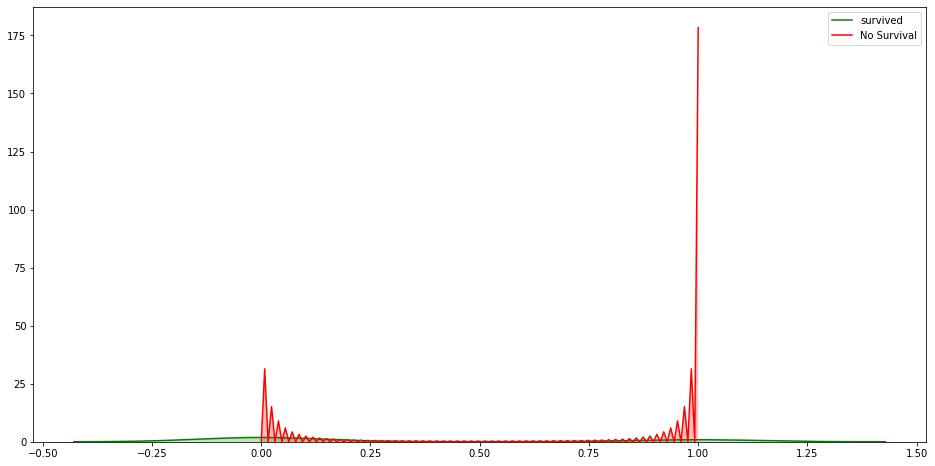

In [60]:
plt.figure(figsize=(16,8))
aa=sns.kdeplot(df['sex_male'][df['survived']==1],color='green',shade=True,label='survived')
sns.kdeplot(df['sex_male'][df['survived']==0],color='red',shade=True,label='No Survival')

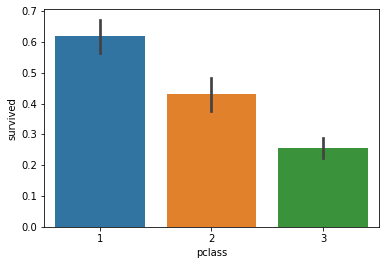

In [61]:
sns.barplot(x='pclass',y='survived',data=df)

In [64]:
y=df['survived']
X=df.drop(['survived'],axis=1)

In [65]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30, random_state=15)


In [66]:
print(X_train.shape)

(916, 4)


In [67]:
print(X_test.shape)

(393, 4)


In [68]:
print(y_train.shape)

(916,)


In [69]:
print(y_test.shape)

(393,)


In [70]:
log.fit(X_train,y_train)

C:\Users\MR_SA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
y_predict=log.predict(X_test)

In [73]:
predictions = pd.DataFrame(list(zip(y_test,y_predict)),columns=['actual','prediction'])
predictions.head()

,actual,prediction
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


In [74]:
cm= pd.DataFrame(confusion_matrix(y_test,y_predict),columns=['Predicted No Survival','Predicted Survival'],index=['True No Survival','True Survival'])

In [75]:
cm

,Predicted No Survival,Predicted Survival
True No Survival,201,35
True Survival,50,107


In [76]:
Accuracy= (201+107)/(201+50+35+107)

In [77]:
print(Accuracy*100)

78.37150127226464


In [78]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       236
           1       0.75      0.68      0.72       157

    accuracy                           0.78       393
   macro avg       0.78      0.77      0.77       393
weighted avg       0.78      0.78      0.78       393

